# Pandas
In this notebook I'll study the [pandas](https://pandas.pydata.org/) python library that is a very famous library for data manipulation and analysis.

In [1]:
# Importing the library
import pandas as pd
import seaborn as sns
print(pd.__version__)
print(sns.__version__)

1.0.5
0.10.1


There is a folder called data in the same directory and we have a csv file called `aluguel.csv` that I'll use as my database for this EDA.
This database contains information about properties and rental prices in the city or Rio de Janeiro in Brazil

In [2]:
!cd data && ls -la

total 11720
drwxr-xr-x  11 nathan  staff      352 Jul 22 17:55 .
drwxr-xr-x  10 nathan  staff      320 Jul 23 13:45 ..
drwxr-xr-x   9 nathan  staff      288 Jul 22 17:55 .ipynb_checkpoints
-rw-r--r--@  1 nathan  staff  1634127 Jun  8  2018 aluguel.csv
-rw-r--r--   1 nathan  staff     1421 Jul 22 15:05 aluguel.json
-rw-r--r--   1 nathan  staff      537 Jul 22 15:05 aluguel.txt
-rw-r--r--   1 nathan  staff    10504 Jul 22 15:05 aluguel.xlsx
-rw-r--r--   1 nathan  staff    32000 Jul 22 15:05 dados_html_1.html
-rw-r--r--   1 nathan  staff   110487 Jul 22 15:05 dados_html_2.html
-rw-r--r--   1 nathan  staff  1303356 Jul 22 18:27 residential_properties.csv
-rw-r--r--   1 nathan  staff  1176129 Jul 22 18:27 residential_properties_without_index.csv


In [3]:
# Loading the data as a pandas DataFrame
aluguel_df = pd.read_csv('data/aluguel.csv', delimiter=";")
aluguel_df

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
...,...,...,...,...,...,...,...,...,...
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0
32958,Apartamento,Leblon,2,0,0,70,3000.0,760.0,NaN


In [4]:
type(aluguel_df)

pandas.core.frame.DataFrame

In [5]:
aluguel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32960 non-null  object 
 1   Bairro      32960 non-null  object 
 2   Quartos     32960 non-null  int64  
 3   Vagas       32960 non-null  int64  
 4   Suites      32960 non-null  int64  
 5   Area        32960 non-null  int64  
 6   Valor       32943 non-null  float64
 7   Condominio  28867 non-null  float64
 8   IPTU        22723 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ MB


In [6]:
aluguel_df.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,NaN,NaN
8,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0


# Information about the DataFrame

In [7]:
aluguel_df.dtypes

Tipo           object
Bairro         object
Quartos         int64
Vagas           int64
Suites          int64
Area            int64
Valor         float64
Condominio    float64
IPTU          float64
dtype: object

In [8]:
aluguel_dtypes = pd.DataFrame(aluguel_df.dtypes, columns=['Types'])
aluguel_dtypes.columns.name = "Columns"
aluguel_dtypes

Columns,Types
Tipo,object
Bairro,object
Quartos,int64
Vagas,int64
Suites,int64
Area,int64
Valor,float64
Condominio,float64
IPTU,float64


In [9]:
(records, columns) = aluguel_df.shape
print("The DataFrame has {} entries and each entry has {} columns"
      .format(records, columns))

The DataFrame has 32960 entries and each entry has 9 columns


## Property types

We know that we have a column called `Tipo` which means type. The first task is: what are all the property types that the `aluguel` DataFrame has?

In [10]:
types = aluguel_df["Tipo"]
types

0                      Quitinete
1                           Casa
2        Conjunto Comercial/Sala
3                    Apartamento
4                    Apartamento
                  ...           
32955                  Quitinete
32956                Apartamento
32957                Apartamento
32958                Apartamento
32959    Conjunto Comercial/Sala
Name: Tipo, Length: 32960, dtype: object

In [11]:
unique_types = types.unique()
unique_types

array(['Quitinete', 'Casa', 'Conjunto Comercial/Sala', 'Apartamento',
       'Casa de Condomínio', 'Prédio Inteiro', 'Flat', 'Loja/Salão',
       'Galpão/Depósito/Armazém', 'Casa Comercial', 'Casa de Vila',
       'Terreno Padrão', 'Box/Garagem', 'Loft',
       'Loja Shopping/ Ct Comercial', 'Chácara', 'Loteamento/Condomínio',
       'Sítio', 'Pousada/Chalé', 'Studio', 'Hotel', 'Indústria'],
      dtype=object)

In [12]:
print("There are {} property types".format(len(unique_types)))

There are 22 property types


In [13]:
unique_types_series = types.drop_duplicates()
unique_types_series

0                          Quitinete
1                               Casa
2            Conjunto Comercial/Sala
3                        Apartamento
7                 Casa de Condomínio
16                    Prédio Inteiro
17                              Flat
29                        Loja/Salão
80           Galpão/Depósito/Armazém
83                    Casa Comercial
117                     Casa de Vila
159                   Terreno Padrão
207                      Box/Garagem
347                             Loft
589      Loja Shopping/ Ct Comercial
2157                         Chácara
3354           Loteamento/Condomínio
4379                           Sítio
4721                   Pousada/Chalé
6983                          Studio
9687                           Hotel
23614                      Indústria
Name: Tipo, dtype: object

In [14]:
type_count = aluguel_df["Tipo"].value_counts()
type_count

Apartamento                    19532
Conjunto Comercial/Sala         6815
Loja/Salão                      1426
Casa de Condomínio               996
Casa                             967
Quitinete                        836
Galpão/Depósito/Armazém          623
Flat                             476
Prédio Inteiro                   301
Casa Comercial                   265
Casa de Vila                     249
Loja Shopping/ Ct Comercial      247
Box/Garagem                       82
Terreno Padrão                    70
Loft                              51
Sítio                             10
Loteamento/Condomínio              5
Studio                             4
Hotel                              2
Pousada/Chalé                      1
Indústria                          1
Chácara                            1
Name: Tipo, dtype: int64

We already know that the most common type in the dataset is `Apartmento`

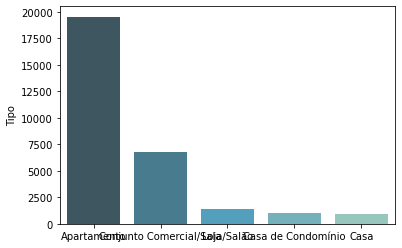

In [15]:
sns.barplot(x=type_count.head(5).index, y=type_count.head(5), palette="GnBu_d")

In [16]:
property_types = pd.DataFrame(unique_types_series)
property_types

,Tipo
0,Quitinete
1,Casa
2,Conjunto Comercial/Sala
3,Apartamento
7,Casa de Condomínio
16,Prédio Inteiro
17,Flat
29,Loja/Salão
80,Galpão/Depósito/Armazém
83,Casa Comercial


The index is coming from the original index from the `aluguel` dataframe. Let's reset the indexes so it makes more sense to our EDA.

In [17]:
property_types.index

Int64Index([    0,     1,     2,     3,     7,    16,    17,    29,    80,
               83,   117,   159,   207,   347,   589,  2157,  3354,  4379,
             4721,  6983,  9687, 23614],
           dtype='int64')

In [18]:
property_types.reset_index(drop=True, inplace=True)

In [19]:
property_types.index

RangeIndex(start=0, stop=22, step=1)

In [20]:
property_types

,Tipo
0,Quitinete
1,Casa
2,Conjunto Comercial/Sala
3,Apartamento
4,Casa de Condomínio
5,Prédio Inteiro
6,Flat
7,Loja/Salão
8,Galpão/Depósito/Armazém
9,Casa Comercial


The inplace argument mutates the variable. If I don't use it I have to reassign the variable `property_types`

# What are the residential properties?

In [21]:
residential_types = ['Quitinete', 'Casa', 'Apartamento',
       'Casa de Condomínio', 'Flat','Casa de Vila']

## Using boolean selection

In [22]:
residential_selection = aluguel_df["Tipo"].isin(residential_types)
residential_selection

0         True
1         True
2        False
3         True
4         True
         ...  
32955     True
32956     True
32957     True
32958     True
32959    False
Name: Tipo, Length: 32960, dtype: bool

In [23]:
aluguel_df[residential_selection]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


## Using DataFrame query

In [24]:
residential_properties_df = aluguel_df.query("Tipo in @residential_types")
residential_properties_df

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


Let's confirm if only the residential types are selected as expected:

In [25]:
types_residential_selected = list(residential_properties_df["Tipo"].drop_duplicates())
types_residential_selected

['Quitinete',
 'Casa',
 'Apartamento',
 'Casa de Condomínio',
 'Flat',
 'Casa de Vila']

In [26]:
types_residential_selected == residential_types

True

😎😃

In [27]:
residential_properties_df.shape

(23056, 9)

In [28]:
aluguel_df.shape

(32960, 9)

In [29]:
print("The total of residental properties in our database is {} from {}".format(residential_properties_df.shape[0], aluguel_df.shape[0]))

The total of residental properties in our database is 23056 from 32960


In [30]:
residential_properties_df.index = range(residential_properties_df.shape[0])
residential_properties_df

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
23051,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
23052,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
23053,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
23054,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


# Exporting DataFrame
Now that I made the analysis and cleaned the data to get only the residential properties let's export this DataFrame as a csv so it can be reused in other notebooks for example.

In [31]:
residential_properties_df.to_csv("data/residential_properties.csv", sep=";")

## Using exported DataFrame

In [32]:
residential = pd.read_csv("data/residential_properties.csv", sep=";")
residential

,Unnamed: 0,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
4,4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
23051,23051,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
23052,23052,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
23053,23053,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
23054,23054,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


I didn't inform that it wasn't necessary to export the index. Pandas thinks that the index is also a variable.

In [33]:
residential_properties_df.to_csv("data/residential_properties_without_index.csv", sep=";", index=False)

Now let's load the cleaned csv

In [34]:
residential_cleaned = pd.read_csv("data/residential_properties_without_index.csv", sep=";")
residential_cleaned

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
23051,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
23052,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
23053,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
23054,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


# Selections and frequencies

These are our tasks now:

### Task 1
Select only properties from type `Apartamento`

In [35]:
apartments = residential_cleaned.query("Tipo=='Apartamento'")
apartments

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
5,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
8,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
23049,Apartamento,Vila Valqueire,2,0,0,52,1000.0,550.0,NaN
23051,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
23053,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
23054,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [36]:
apartments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19532 entries, 2 to 23055
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        19532 non-null  object 
 1   Bairro      19532 non-null  object 
 2   Quartos     19532 non-null  int64  
 3   Vagas       19532 non-null  int64  
 4   Suites      19532 non-null  int64  
 5   Area        19532 non-null  int64  
 6   Valor       19525 non-null  float64
 7   Condominio  18787 non-null  float64
 8   IPTU        14060 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.5+ MB


In [37]:
apartments.shape

(19532, 9)

In [38]:
print("There are {} apartments out from {} residential properties".format(apartments.shape[0], residential_cleaned.shape[0]))

There are 19532 apartments out from 23056 residential properties


## Task 2
Select properties that are `Casa`, `Cada de Condomínio` or `Casa de Vila`

In [39]:
residential_types_task_2 = ['Casa', 'Casa de Condomínio', 'Casa de Vila']
residential_task_2_selection = residential_cleaned["Tipo"].isin(residential_types_task_2)
residential_task_2_selection

0        False
1         True
2        False
3        False
4        False
         ...  
23051    False
23052    False
23053    False
23054    False
23055    False
Name: Tipo, Length: 23056, dtype: bool

In [40]:
residential_task_2 = residential_cleaned[residential_task_2_selection]
residential_task_2

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
6,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,NaN,NaN
7,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN
15,Casa de Condomínio,Taquara,3,1,1,115,2000.0,NaN,NaN
19,Casa de Condomínio,Barra da Tijuca,4,3,2,466,7500.0,2695.0,NaN
...,...,...,...,...,...,...,...,...,...
23021,Casa de Condomínio,Freguesia (Jacarepaguá),3,3,1,155,2000.0,530.0,1250.0
23023,Casa,Bento Ribeiro,2,1,0,60,1400.0,NaN,NaN
23031,Casa de Condomínio,Barra da Tijuca,3,5,3,1000,20000.0,3000.0,NaN
23034,Casa,Centro,5,0,1,160,5000.0,NaN,80.0


In [41]:
residential_task_2.shape

(2212, 9)

## Task 3
Select all the properites with area betwwen 60 e 100 squared meters, including the limits

In [42]:

residential_task_3 = residential_cleaned.query("Area>=60 and Area<=100")
residential_task_3

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
7,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN
9,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0
10,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
...,...,...,...,...,...,...,...,...,...
23044,Apartamento,Recreio dos Bandeirantes,3,2,1,88,1550.0,790.0,NaN
23046,Apartamento,Leblon,3,0,1,80,3000.0,1010.0,249.0
23051,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
23053,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0


In [43]:
residential_task_3.shape

(8975, 9)

## Task 4
Select all properties that have at least 4 rooms and rent less than R$ 2.000,00

In [44]:
residential_task_4 = residential_cleaned.query("Quartos>=4 and Valor<2000")
residential_task_4

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
491,Apartamento,Recreio dos Bandeirantes,4,2,2,160,1900.0,830.0,NaN
1018,Apartamento,Taquara,4,1,1,110,1900.0,NaN,NaN
2000,Casa,Campo Grande,4,1,4,100,1600.0,NaN,NaN
2142,Casa,Engenho de Dentro,4,3,0,120,1500.0,NaN,NaN
2241,Apartamento,Recreio dos Bandeirantes,4,2,2,125,1700.0,NaN,90.0
2381,Casa de Vila,Méier,4,0,1,85,1600.0,NaN,NaN
4028,Casa,Campo Grande,4,1,0,140,1700.0,NaN,NaN
4029,Apartamento,Campo Grande,4,2,1,115,1900.0,500.0,NaN
4441,Apartamento,Recreio dos Bandeirantes,4,2,1,105,1900.0,1492.0,205.0
5192,Apartamento,Cidade Nova,4,0,0,110,1300.0,NaN,NaN


In [45]:
residential_task_4.shape

(41, 9)

In [46]:
ordered = residential_task_4.sort_values(by=["Valor", "Quartos"])
ordered.head(3)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
18141,Apartamento,Taquara,4,3,1,190,1200.0,NaN,NaN
11548,Casa,Santo Cristo,5,0,0,85,1200.0,NaN,NaN
5192,Apartamento,Cidade Nova,4,0,0,110,1300.0,NaN,NaN


From this DataFrame I can conclude that the residential properties with at least 4 rooms that have the cheapest rent in Rio are located in the areas: Taquara, Santo Cristo and Pedra de Guaratiba

# Dealing with missing data

In [49]:
df = pd.read_csv("data/residential_properties_without_index.csv", sep=";")
df

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
23051,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
23052,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
23053,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
23054,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [50]:
df.isnull()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,True
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...
23051,False,False,False,False,False,False,False,False,False
23052,False,False,False,False,False,False,False,False,False
23053,False,False,False,False,False,False,False,False,False
23054,False,False,False,False,False,False,False,False,False


In [51]:
df.notnull()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,False,False
2,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,False
4,True,True,True,True,True,True,True,False,False
...,...,...,...,...,...,...,...,...,...
23051,True,True,True,True,True,True,True,True,True
23052,True,True,True,True,True,True,True,True,True
23053,True,True,True,True,True,True,True,True,True
23054,True,True,True,True,True,True,True,True,True


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23056 entries, 0 to 23055
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        23056 non-null  object 
 1   Bairro      23056 non-null  object 
 2   Quartos     23056 non-null  int64  
 3   Vagas       23056 non-null  int64  
 4   Suites      23056 non-null  int64  
 5   Area        23056 non-null  int64  
 6   Valor       23047 non-null  float64
 7   Condominio  21198 non-null  float64
 8   IPTU        16191 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.6+ MB


Calling the method info in the data frame I can see which columns have null data. Let's select all properties that have null value in the column `Valor`

In [53]:
df[df['Valor'].isnull()]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
60,Apartamento,Barra da Tijuca,2,1,1,70,NaN,970.0,68.0
1521,Apartamento,Leme,2,0,0,75,NaN,878.0,NaN
1715,Casa,Campo Grande,3,4,3,363,NaN,NaN,NaN
2052,Apartamento,Botafogo,2,0,0,95,NaN,1010.0,170.0
2074,Apartamento,Copacabana,2,0,0,72,NaN,850.0,NaN
5047,Casa,Campo Grande,3,2,1,100,NaN,NaN,NaN
8753,Apartamento,Leme,2,0,1,75,NaN,878.0,NaN
9141,Apartamento,Glória,3,0,1,135,NaN,910.0,228.0
9346,Apartamento,Gávea,3,1,1,105,NaN,880.0,221.0


Let's remove all the entries that don't have `Valor` set

In [56]:
entries_before_clean = df.shape[0]
entries_before_clean

23056

In [60]:
df.dropna(subset = ['Valor'], inplace=True)
df

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
23051,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
23052,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
23053,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
23054,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [61]:
entries_after_clean = df.shape[0]
entries_after_clean

23047

In [62]:
print("{} entries were removed after the cleanup".format(entries_before_clean - entries_after_clean))

9 entries were removed after the cleanup


In [63]:
df[df['Valor'].isnull()]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU


Here I have an empty dataframe because there are no entries in the data frame that have null `Valor` values

## Dealing with missing data: conditional treatment

In [65]:
df[df['Condominio'].isnull()].shape

(1856, 9)

In [68]:
apartments_with_condominio_null_selection = (df['Tipo'] == 'Apartamento') & (df['Condominio'].isnull())
apartments_with_condominio_null_selection

0        False
1        False
2        False
3        False
4         True
         ...  
23051    False
23052    False
23053    False
23054    False
23055    False
Length: 23047, dtype: bool

In [67]:
entries_before_clean = df.shape[0]
entries_before_clean

23047

In [69]:
df = df[~apartments_with_condominio_null_selection]
df

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
...,...,...,...,...,...,...,...,...,...
23051,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
23052,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
23053,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
23054,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [70]:
entries_after_clean = df.shape[0]
entries_after_clean

22302

In [71]:
print("{} entries were removed after the cleanup".format(entries_before_clean - entries_after_clean))

745 entries were removed after the cleanup


In [72]:
df = df.fillna({'Condominio': 0, 'IPTU': 0} )
df

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
5,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
...,...,...,...,...,...,...,...,...,...
23051,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
23052,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
23053,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
23054,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [73]:
df[df['Condominio'].isnull()].shape[0]

0

In [74]:
df[df['IPTU'].isnull()].shape[0]

0

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22302 entries, 0 to 23055
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        22302 non-null  object 
 1   Bairro      22302 non-null  object 
 2   Quartos     22302 non-null  int64  
 3   Vagas       22302 non-null  int64  
 4   Suites      22302 non-null  int64  
 5   Area        22302 non-null  int64  
 6   Valor       22302 non-null  float64
 7   Condominio  22302 non-null  float64
 8   IPTU        22302 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.7+ MB


In [76]:
df.to_csv('data/properties_cleaned.csv', sep=";", index = False)